In [4]:
import pandas as pd
import utils
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

Carga y Exploración Inicial de Datos:

* Descargar el dataset de la competencia.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar valores faltantes y outliers.




In [ ]:
##Cargar los datos
ruta_archivo = '../ejercicios_core/data/Student Depression Dataset.csv'

df = utils.cargar_datos(ruta_archivo)

df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [6]:
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 n

Este dataset cuenta con 27901 filas y 18 columnas, ademas cuenta con algunos valores nulos como Financial Stress que es probablemente debido a que no tenian esa informacion al crear el dataset.

Análisis Exploratorio de Datos (EDA):

* Calcular estadísticas descriptivas básicas.
* Crear visualizaciones para entender la distribución de las variables y sus relaciones.
* Detectar y tratar valores faltantes y outliers.


In [7]:
na_df = utils.identificar_valores_faltantes(df)
print(na_df)
utils.verificacion_elementos_duplicados(df)


Valores faltantes en el dataset
                                       datos sin NAs en q  Na en q  Na en %
Financial Stress                                    27898        3     0.01
id                                                  27901        0     0.00
Gender                                              27901        0     0.00
Family History of Mental Illness                    27901        0     0.00
Work/Study Hours                                    27901        0     0.00
Have you ever had suicidal thoughts ?               27901        0     0.00
Degree                                              27901        0     0.00
Dietary Habits                                      27901        0     0.00
Sleep Duration                                      27901        0     0.00
Job Satisfaction                                    27901        0     0.00
Study Satisfaction                                  27901        0     0.00
CGPA                                                2790

Hay solo 3 valores nulos en finalcial stress y no hay valores duplicados.

In [8]:
print(df['Financial Stress'].value_counts())
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mode()[0])

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64


In [9]:
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
id,27901,0,0.0
Gender,27901,0,0.0
Family History of Mental Illness,27901,0,0.0
Financial Stress,27901,0,0.0
Work/Study Hours,27901,0,0.0
Have you ever had suicidal thoughts ?,27901,0,0.0
Degree,27901,0,0.0
Dietary Habits,27901,0,0.0
Sleep Duration,27901,0,0.0
Job Satisfaction,27901,0,0.0


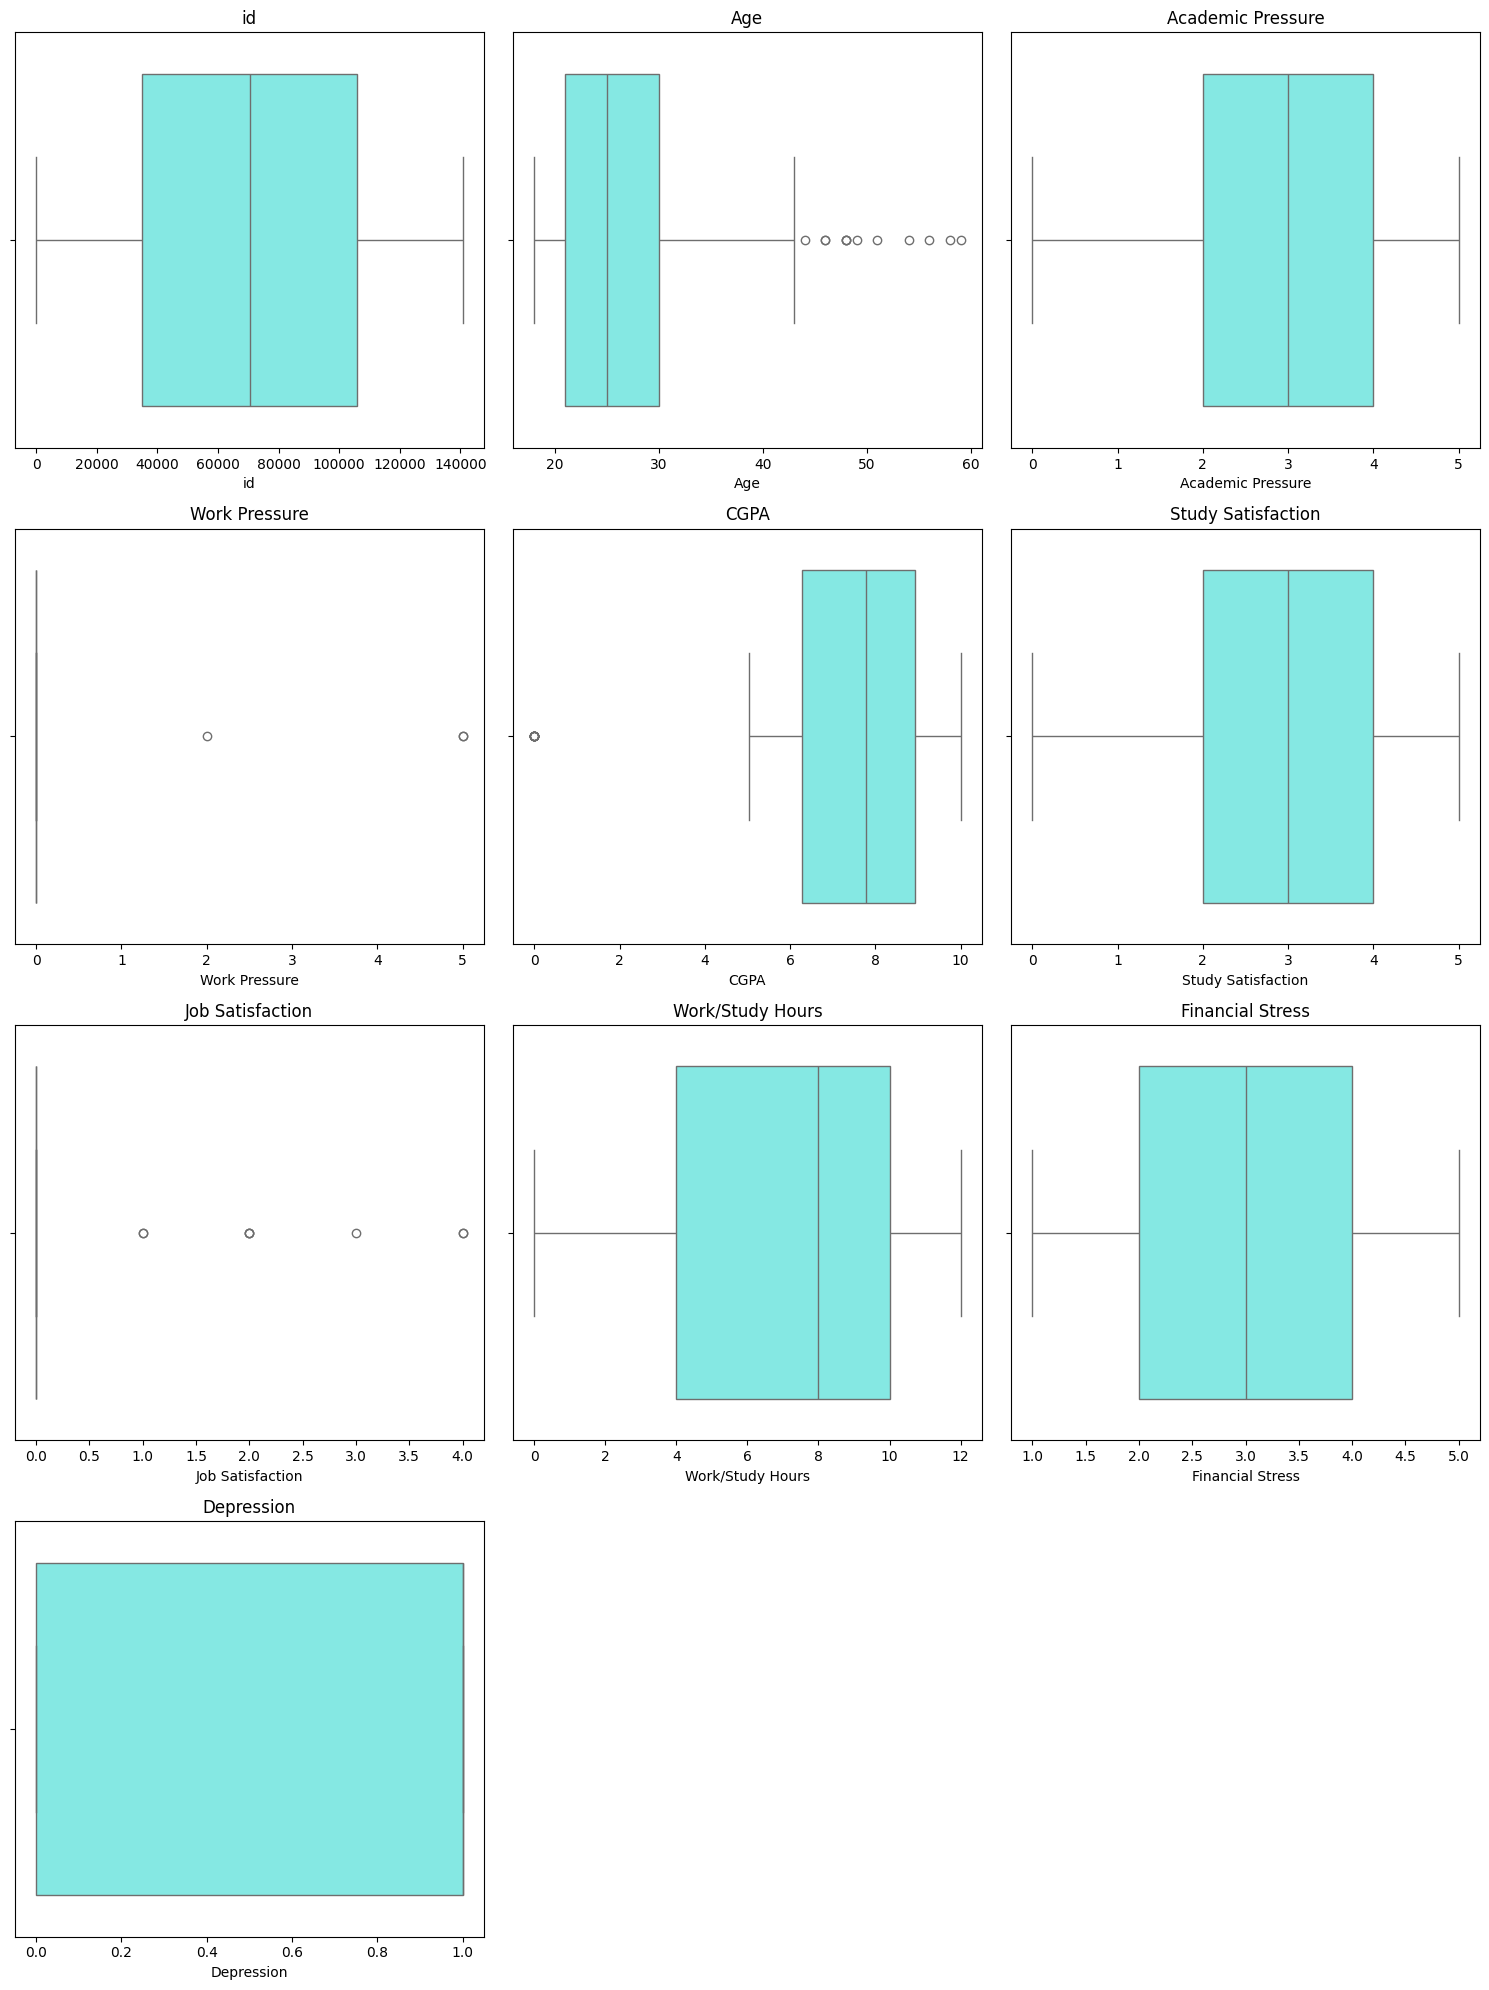

In [10]:
numeric_values = df.select_dtypes(include=['float64', 'int64'])
utils.plot_grafico_outliers(numeric_values,4,3,df)

Se encuentran valores outliers en datos como age, pero los cuales seran escalados para no eliminar los mismos ya que podrian tratarse de estudiantes de postgrado u otro estudiante adulto.

In [11]:
utils.estadisticas_descriptivas(df)

Estadisticas del dataset
                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min       

Segun las estadisticas descriptivas podemos notar lo siguiente:
- id parece ser un identificador único con un rango muy amplio, por lo que sera eliminado.
- Las variables como "Work Pressure", "Job Satisfaction", y "Depression" tienen valores concentrados en valores bajos o cercanos a 0, mientras que las variables de "CGPA" y "Study Satisfaction" tienen distribuciones más amplias.
- La variable "Depression" tiene valores binarios (0 o 1), lo que sugiere que podría estar representando la presencia o ausencia de depresión.

8


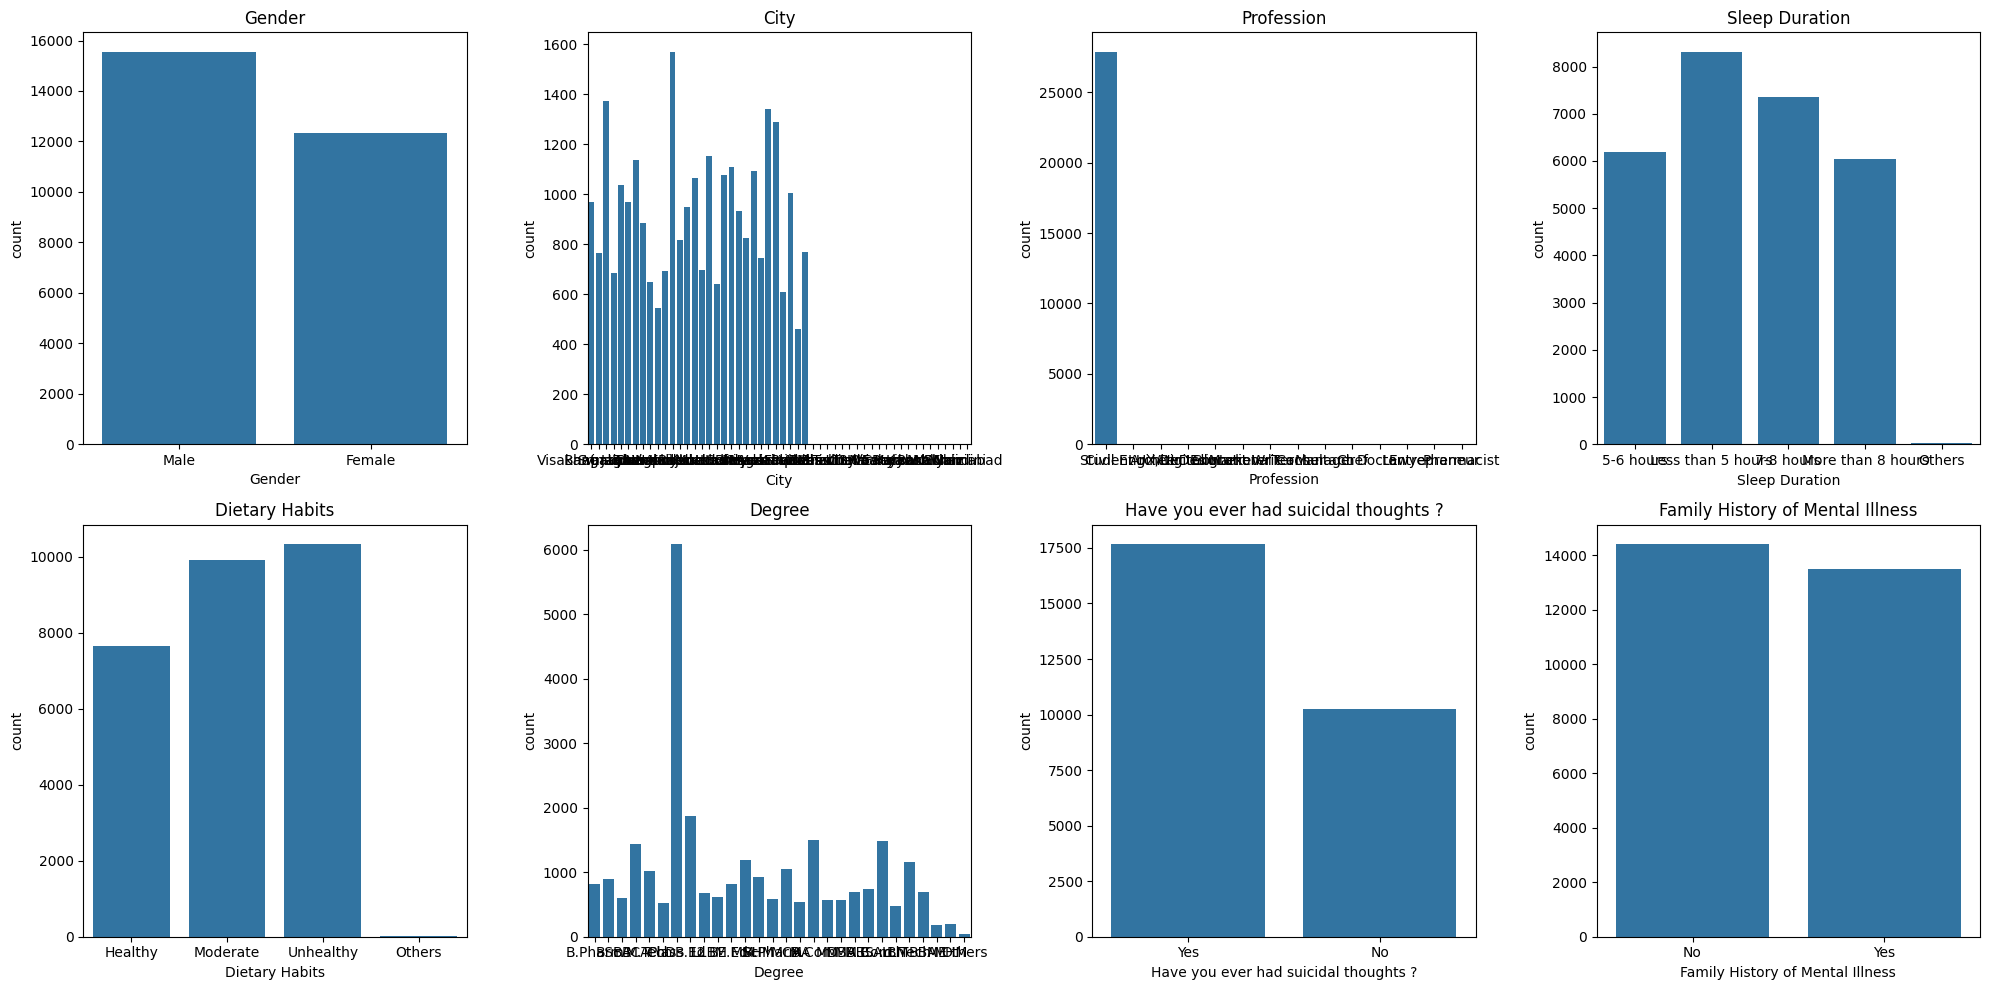

In [12]:
variables_categoricas = df.select_dtypes(include=['object', 'category'])
#contar el numero de variables categoricas
print(variables_categoricas.shape[1])
utils.plot_univariados_categoricos(df,4,2)

Los datos categoricos son dispersos, y algunos sesgados en un valor especifico como es el caso de degree.

Preprocesamiento de Datos:

* Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).
* Dividir el dataset en conjuntos de entrenamiento y prueba.


In [13]:
# Definir X e y. Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop(['Depression'], axis=1)
y = df['Depression']
##transformamos y con labelenconder
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
### Ya se han tratado los valores nulos pero aun existen valores outliers que seran escalados con RobustScaler
###Pipeline para preprocesamiento de valores
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Get column names
categorical_features = X.select_dtypes(include=['object']).columns.tolist() # Get column names
# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Crear transformer para columnas categóricas con imputación
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Integrar en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Crear y aplicar el pipeline a los datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)

# Aplicar la misma transformación a los datos de prueba (sin hacer fit)
X_test_transformed = pipeline.transform(X_test)

print("Preprocesamiento completado. Datos transformados listos para modelar.")

Preprocesamiento completado. Datos transformados listos para modelar.


Implementación de Modelos y Benchmark:

* Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
* Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.
* Comparar el rendimiento de los modelos utilizando métricas adecuadas.


In [15]:
# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False),
    'LightGBM': lgb.LGBMClassifier(random_state=42)

}

# Evaluación con validación cruzada
cv_results = {}
for model_name, model in models.items():
    # Validación cruzada con scoring de 'accuracy'
    scores = cross_val_score(model, X_train_transformed , y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Comparar los resultados
cv_summary = pd.DataFrame(cv_results).T
cv_summary.columns = [f'Fold {i+1}' for i in range(cv_summary.shape[1])]
cv_summary['Mean Accuracy'] = cv_summary.mean(axis=1)
cv_summary['Std Dev'] = cv_summary.std(axis=1)
print("\nResumen de Validación Cruzada:")
print(cv_summary)

Logistic Regression: Mean Accuracy = 0.8436, Std = 0.0062
K-Nearest Neighbors: Mean Accuracy = 0.8094, Std = 0.0081
Decision Tree: Mean Accuracy = 0.7701, Std = 0.0101


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Mean Accuracy = 0.8309, Std = 0.0067
[LightGBM] [Info] Number of positive: 10465, number of negative: 7391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 17856, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586078 -> initscore=0.347773
[LightGBM] [Info] Start training from score 0.347773
[LightGBM] [Info] Number of positive: 10465, number of negative: 7391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 17856, number

Lo que se puede ver en este entrenamiento inicial es que el cross validation dio como resultado a logistic regression y LightGBM como los mejores modelos ya que tienen accuracy que rondan entre los 0.84 y una desviacion estandard baja entre folds que indica que fueron estables en cada entrenamiento.


In [16]:
##Utilizacion de RandomizedSearchCV

# Espacios de búsqueda para RandomizedSearchCV
random_grid_lr = {
    'C': uniform(0.01, 10),
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': randint(100, 500)
}

random_grid_knn = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

random_grid_xgb = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_grid_lgb = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 50),
    'subsample': uniform(0.5, 0.5)
}

# Asociar los modelos con sus espacios de parámetros para RandomizedSearchCV
random_models = {
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), random_grid_lr),
    'K-Nearest Neighbors': (KNeighborsClassifier(), random_grid_knn),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), random_grid_dt),
    'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, random_state=42), random_grid_xgb),
    'LightGBM': (lgb.LGBMClassifier(random_state=42), random_grid_lgb)
}

# Realizar RandomizedSearchCV para cada modelo
random_results = {}
for name, (model, random_grid) in random_models.items():
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=random_grid,
        n_iter=50,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train_transformed, y_train)
    random_results[name] = random_search

# Crear DataFrame con los mejores resultados
results_data = {
    name: {
        'Best Params': random_search.best_params_,
        'Best Score': random_search.best_score_
    }
    for name, random_search in random_results.items()
}

results_df = pd.DataFrame(results_data).T
print(results_df)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:55:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 13081, number of negative: 9239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586066 -> initscore=0.347727
[LightGBM] [Info] Start training from score 0.347727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b